In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Transformação da melodia em ranhuras na estrada

In [16]:
# Transformação do arquivo de audio WAV em um vetor y x t
from scipy.io import wavfile

sample_rate, data = wavfile.read('file_example_WAV_1MG.wav')

print(sample_rate)


44100


C:\Users\muril\AppData\Local\Temp\ipykernel_7028\2946637373.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('file_example_WAV_1MG.wav')


In [17]:
print(data)

[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [-2 -2]
 [ 0  2]
 [ 2 -2]]


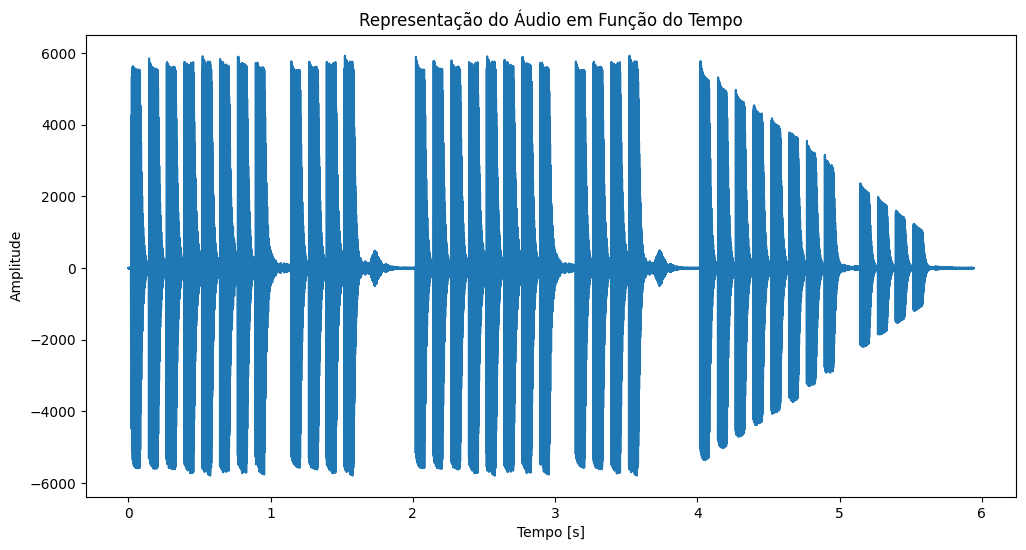

In [18]:
# possui dois canais, escolher somente um
if data.ndim > 1:
    data_y = data[:, 0]

duration = len(data) / sample_rate
time = np.linspace(0., duration, len(data))

plt.figure(figsize=(12, 6))
plt.plot(time, data_y)
plt.title('Representação do Áudio em Função do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

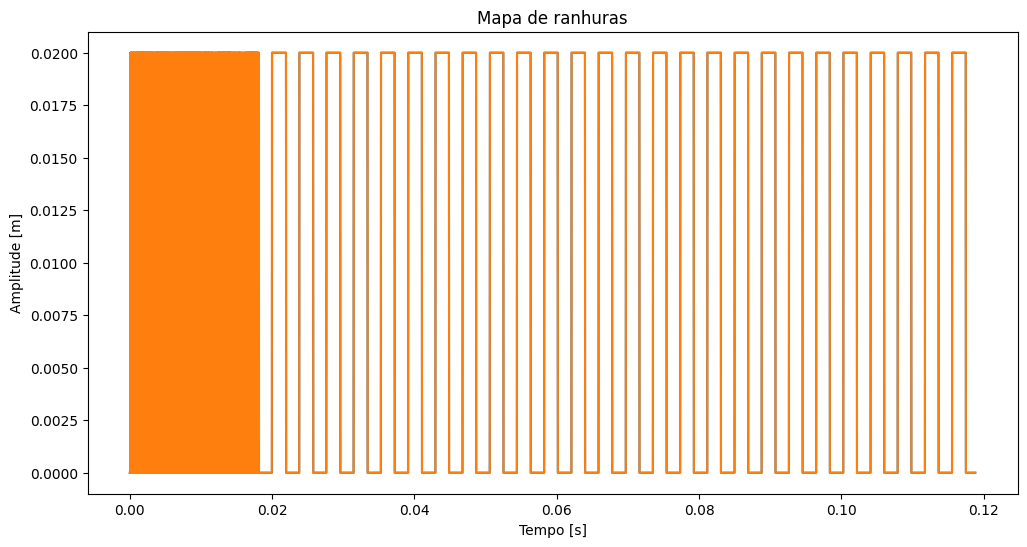

In [24]:
# Transformação do vetor anterior em um vetor para uma onda quadrada y x m. Considere
# a profundidade de cada ranhura constante e igual a 2 cm.

# teste com um segmento pequeno

# Definir um limiar para a onda quadrada
limiar = 0.1

# Transformar em onda quadrada
data_square = np.where(data >= limiar, 1, 0)

# Mapear a profundidade das ranhuras
PROFUNDIDADE = 0.02  # 2 cm
data_y_m = data_square * PROFUNDIDADE

# teste com um segmento pequeno
data_y_m = data_y_m[0:int(0.02*len(data_y_m))]
time_y_m = time[0:int(0.02*len(time))]
plt.figure(figsize=(12, 6))
plt.plot(time_y_m, data_y_m)
plt.title('Mapa de ranhuras')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [m]')
plt.show()

In [ ]:
# Definição do mapa de ranhuras (10 linhas de 1 segundo cada

# Etapa 4 - Simulação

In [ ]:
# Considere o veículo como sendo um sistema de 1GDL com excitação na base
qsi = 0.3
f0 = 1.5 # Hz
m = [1200, 2400, 4500] # kg
V_kmh = 60 
V_ms = V_kmh/3.6
k = 
c = 

In [ ]:
# 
w = 2 * np.pi * f0 # acho que isso tá errado, acho que a frequencia é um valor médio que pegamos da musica
w_n = np.sqrt(k/m)
r = w / w_n
qsi = c / (2*np.sqrt(k*m[0]))

In [ ]:
# Sabendo que o som produzido na cabine será proporcional ao seu deslocamento,
# determine para qual massa haverá a maior transmissibilidade. Utilize a curva de
# transmissibilidade de um sistema de 1GDL para justificar a sua resposta.

def calcular_transmissibilidade(qsi, r):
    Td = ((1 + 2*qsi*r**2) / ((1 - r**2) + (2*qsi*r)**2))**(1/2)
    return Td